# SETUP

The first part of the code sets up the pca_wavelet network, the training comes later. Most of this code comes from the original authors

In [1]:
import sys
sys.path.append('../segmentation_helper')

import tensorflow as tf
import keras
import tqdm
import matplotlib.pyplot as plt
import numpy as np
import data_loader as dl
import model_broker as mb
import os

GPU device not found
Found GPU at: 


In [2]:
tf.keras.backend.set_floatx("float64")

In [3]:
loader = dl.DataLoader(IMAGE_SIZE=64,debug=True)
img_train,img_test = loader.import_processed_img()
seg_train,seg_test = loader.import_processed_seg()
combined_train, combined_test = loader.import_processed_combined()

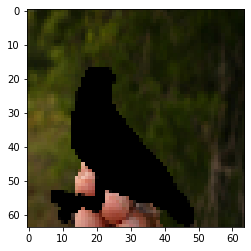

In [4]:
plt.imshow((next(iter(seg_train))[0]))

In [5]:
img_broker = mb.ModelBroker(trainset=img_train,
                            testset=img_test,
                            dirname="bird_img",
                            keep_percent=0.3,
                            count=3,
                            sample_size=100)
                            #activity_regularizer = scaledtanh,
                            #inverse_activity_regularizer=scaledatanh,
                            #activation_before=True)
imghead,imginvhead = img_broker.build_model()
imghead,imginvhead = img_broker.load_model()                                      


keep_percent 0.29752575559207534
meanimg.dtype <dtype: 'float64'>
self.mean.dtype <dtype: 'float64'>
self.mean.dtype <dtype: 'float64'>
Starting level 0
Completing 32.0
pca shape tf.Tensor([27 27], shape=(2,), dtype=int32)
keep_channels 8 keep_max 12.0
keep_channels 8
ufilts.shape (1, 1, 1, 27, 8)
end loop 32.0
Starting level 1


C:\Users\spurl\AppData\Local\Temp\__autograph_generated_filey2zjlfi7.py:40: SyntaxWarning: "is" with a literal. Did you mean "=="?
  ag__.if_stmt((ag__.ld(self).data_format is 'channels_first'), if_body, else_body, get_state, set_state, ('pad',), 1)
C:\Users\spurl\AppData\Local\Temp\__autograph_generated_filey2zjlfi7.py:42: SyntaxWarning: "is" with a literal. Did you mean "=="?
  ag__.if_stmt((ag__.ld(self).data_format is 'channels_last'), if_body_1, else_body_1, get_state_1, set_state_1, ('pad',), 1)


Completing 16.0
pca shape tf.Tensor([72 72], shape=(2,), dtype=int32)
keep_channels 21 keep_max 128.0
keep_channels 21
ufilts.shape (1, 1, 1, 72, 21)
end loop 16.0
Starting level 2
Completing 8.0
pca shape tf.Tensor([189 189], shape=(2,), dtype=int32)
keep_channels 56 keep_max 1344.0
keep_channels 56
ufilts.shape (1, 1, 1, 189, 56)
end loop 8.0
saving to: models/bird_img
out.shape (1, 8, 8, 56)
keep_percent 0.29752575559207534
meanimg.dtype <dtype: 'float64'>
self.mean.dtype <dtype: 'float64'>
self.mean.dtype <dtype: 'float64'>
Starting level 0
Completing 32.0
pca shape tf.Tensor([27 27], shape=(2,), dtype=int32)
keep_channels 8 keep_max 12.0
keep_channels 8
ufilts.shape (1, 1, 1, 27, 8)
end loop 32.0
Starting level 1
Completing 16.0
pca shape tf.Tensor([72 72], shape=(2,), dtype=int32)
keep_channels 21 keep_max 128.0
keep_channels 21
ufilts.shape (1, 1, 1, 72, 21)
end loop 16.0
Starting level 2
Completing 8.0
pca shape tf.Tensor([189 189], shape=(2,), dtype=int32)
keep_channels 56 kee

In [6]:
seg_broker = mb.ModelBroker(trainset=seg_train,
                            testset=seg_test,
                            dirname="bird_seg",
                            keep_percent=0.3,
                            count=3,
                            sample_size=100)
                            #activity_regularizer =scaledtanh ,
                            #inverse_activity_regularizer=scaledatanh ,
                            #activation_before=False)
seghead,seginvhead = seg_broker.build_model()                                        
seghead,seginvhead = seg_broker.load_model()

keep_percent 0.29752575559207534
meanimg.dtype <dtype: 'float64'>
self.mean.dtype <dtype: 'float64'>
self.mean.dtype <dtype: 'float64'>
Starting level 0
Completing 32.0
pca shape tf.Tensor([27 27], shape=(2,), dtype=int32)
keep_channels 8 keep_max 12.0
keep_channels 8
ufilts.shape (1, 1, 1, 27, 8)
end loop 32.0
Starting level 1
Completing 16.0
pca shape tf.Tensor([72 72], shape=(2,), dtype=int32)
keep_channels 21 keep_max 128.0
keep_channels 21
ufilts.shape (1, 1, 1, 72, 21)
end loop 16.0
Starting level 2
Completing 8.0
pca shape tf.Tensor([189 189], shape=(2,), dtype=int32)
keep_channels 56 keep_max 1344.0
keep_channels 56
ufilts.shape (1, 1, 1, 189, 56)
end loop 8.0
saving to: models/bird_seg
out.shape (1, 8, 8, 56)
keep_percent 0.29752575559207534
meanimg.dtype <dtype: 'float64'>
self.mean.dtype <dtype: 'float64'>
self.mean.dtype <dtype: 'float64'>
Starting level 0
Completing 32.0
pca shape tf.Tensor([27 27], shape=(2,), dtype=int32)
keep_channels 8 keep_max 12.0
keep_channels 8
ufi

sample.shape (64, 64, 3)
array([[[0.41164216, 0.64420575, 0.75866652],
        [0.41789597, 0.65123314, 0.76431912],
        [0.40791592, 0.66066176, 0.75885034],
        ...,
        [0.40992263, 0.687837  , 0.82478559],
        [0.40337393, 0.68247169, 0.79765248],
        [0.40222886, 0.68991268, 0.81024432]],

       [[0.42560127, 0.64220667, 0.76192558],
        [0.40655255, 0.65612745, 0.77046567],
        [0.40296799, 0.65612745, 0.76029414],
        ...,
        [0.40076977, 0.67889476, 0.80714995],
        [0.41490504, 0.68159473, 0.81903338],
        [0.38468903, 0.69231009, 0.8171224 ]],

       [[0.3989009 , 0.65553385, 0.78058749],
        [0.43173638, 0.64986598, 0.75815719],
        [0.43406862, 0.63984758, 0.79130667],
        ...,
        [0.42254519, 0.66766238, 0.81138176],
        [0.40119869, 0.67393923, 0.80415136],
        [0.40147442, 0.68367797, 0.80902267]],

       ...,

       [[0.19692478, 0.13529795, 0.11088389],
        [0.50474495, 0.42902499, 0.29573378

array([[[0.41164216, 0.64420575, 0.75866652],
        [0.41789597, 0.65123314, 0.76431912],
        [0.40791592, 0.66066176, 0.75885034],
        ...,
        [0.40992263, 0.687837  , 0.82478559],
        [0.40337393, 0.68247169, 0.79765248],
        [0.40222886, 0.68991268, 0.81024432]],

       [[0.42560127, 0.64220667, 0.76192558],
        [0.40655255, 0.65612745, 0.77046567],
        [0.40296799, 0.65612745, 0.76029414],
        ...,
        [0.40076977, 0.67889476, 0.80714995],
        [0.41490504, 0.68159473, 0.81903338],
        [0.38468903, 0.69231009, 0.8171224 ]],

       [[0.3989009 , 0.65553385, 0.78058749],
        [0.43173638, 0.64986598, 0.75815719],
        [0.43406862, 0.63984758, 0.79130667],
        ...,
        [0.42254519, 0.66766238, 0.81138176],
        [0.40119869, 0.67393923, 0.80415136],
        [0.40147442, 0.68367797, 0.80902267]],

       ...,

       [[0.19692478, 0.13529795, 0.11088389],
        [0.50474495, 0.42902499, 0.29573378],
        [0.48187423, 0

pred.shape

 (1, 8, 8, 56)
recon.shape (64, 64, 3)
sample.dtype <dtype: 'float64'>
recon[0].dtype <dtype: 'float64'>
np.prod(sample.shape) 12288
psnr =  20.420644339304154
ncc =  [[1.         0.88572559]
 [0.88572559 1.        ]]
sample[30:34,30:34,0] tf.Tensor(
[[0.39023823 0.39336321 0.42759269 0.43500307]
 [0.40114123 0.41140091 0.43209255 0.44087392]
 [0.4351218  0.46150047 0.52139246 0.00710018]
 [0.44523975 0.03638174 0.03643919 0.00485983]], shape=(4, 4), dtype=float64)
recon[30:34,30:34,0] tf.Tensor(
[[ 0.49300328  0.57452201  0.57018389  0.54327146]
 [ 0.54431745  0.59647317  0.54768012  0.48417577]
 [ 0.44924649  0.3557559   0.31965793  0.20933724]
 [ 0.36479282  0.1252421   0.04718651 -0.03768511]], shape=(4, 4), dtype=float64)


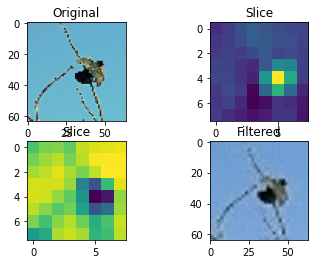

In [7]:
img_broker.check_build(imghead,imginvhead,img_train)

sample.shape (64, 64, 3)
array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]])>]
Consider rewriting this model with the Functional API.


array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]])>]
Consider rewriting this model with the Functional API.


pred.shape (1, 8, 8, 56)
recon.shape (64, 64, 3)
sample.dtype <dtype: 'float64'>
recon[0].dtype <dtype: 'float64'>
np.prod(sample.shape) 12288
psnr =  18.810462610800872
ncc =  [[1.         0.93340182]
 [0.93340182 1.        ]]
sample[30:34,30:34,0] tf.Tensor(
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]], shape=(4, 4), dtype=float64)
recon[30:34,30:34,0] tf.Tensor(
[[-0.0006094  -0.01068148 -0.00302063 -0.00618652]
 [-0.01100912  0.0025521  -0.00184015 -0.00966876]
 [-0.00969386 -0.01501747 -0.00713703  0.00847171]
 [ 0.00169754 -0.0135629  -0.01565142  0.00629661]], shape=(4, 4), dtype=float64)


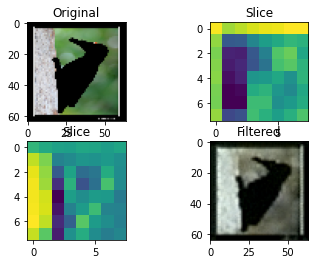

In [9]:
seg_broker.check_build(seghead,seginvhead,seg_test)

# Training

This is the loop used to find the variables to find A and b in y=Ax+b

In [12]:
shape = imghead(next(iter(img_train))).shape

array([[[3.01164210e-01, 3.06057572e-01, 1.08946078e-01],
        [2.64420569e-01, 2.74377674e-01, 1.28605619e-01],
        [1.59454480e-01, 1.75140753e-01, 7.73466229e-02],
        ...,
        [4.71813753e-02, 8.22303966e-02, 8.06334335e-03],
        [6.46398216e-02, 8.28996301e-02, 2.15025656e-02],
        [7.84313753e-02, 8.62745121e-02, 3.13725509e-02]],

       [[3.07103068e-01, 3.05684179e-01, 6.42271787e-02],
        [2.42585793e-01, 2.38848045e-01, 4.09007370e-02],
        [1.18559472e-01, 1.47167981e-01, 1.04846433e-02],
        ...,
        [5.23456670e-02, 8.90012309e-02, 2.07758872e-04],
        [6.61477521e-02, 8.80658329e-02, 2.31617652e-02],
        [6.72631413e-02, 8.78063738e-02, 2.73638554e-02]],

       [[2.88541675e-01, 2.80698538e-01, 5.33088222e-02],
        [2.27083340e-01, 2.36206532e-01, 4.29907702e-02],
        [1.35079667e-01, 1.58609077e-01, 9.83455963e-03],
        ...,
        [5.30321337e-02, 8.82037058e-02, 5.85075840e-03],
        [5.97359464e-02, 8.07

array([[[3.01164210e-01, 3.06057572e-01, 1.08946078e-01],
        [2.64420569e-01, 2.74377674e-01, 1.28605619e-01],
        [1.59454480e-01, 1.75140753e-01, 7.73466229e-02],
        ...,
        [4.71813753e-02, 8.22303966e-02, 8.06334335e-03],
        [6.46398216e-02, 8.28996301e-02, 2.15025656e-02],
        [7.84313753e-02, 8.62745121e-02, 3.13725509e-02]],

       [[3.07103068e-01, 3.05684179e-01, 6.42271787e-02],
        [2.42585793e-01, 2.38848045e-01, 4.09007370e-02],
        [1.18559472e-01, 1.47167981e-01, 1.04846433e-02],
        ...,
        [5.23456670e-02, 8.90012309e-02, 2.07758872e-04],
        [6.61477521e-02, 8.80658329e-02, 2.31617652e-02],
        [6.72631413e-02, 8.78063738e-02, 2.73638554e-02]],

       [[2.88541675e-01, 2.80698538e-01, 5.33088222e-02],
        [2.27083340e-01, 2.36206532e-01, 4.29907702e-02],
        [1.35079667e-01, 1.58609077e-01, 9.83455963e-03],
        ...,
        [5.30321337e-02, 8.82037058e-02, 5.85075840e-03],
        [5.97359464e-02, 8.07

In [13]:
shape_0 = shape[3]
shape_1 = shape[1]*shape[2]
shape_2 = shape[1]

In [14]:
reconstruct = next(iter(seg_train))[0].shape

In [15]:
n = 0.0


xxt = np.zeros([shape_0,shape_0])
yxt = np.zeros([shape_0,shape_0])
x = np.ones([shape_1])
x_m = np.zeros([shape_0])
y = np.ones([shape_1]) 
y_m = np.zeros([shape_0])

bar = tqdm.notebook.tqdm(total = int(combined_train.cardinality()))

for item in iter(combined_train):
    bar.update(1)
    image = item[0][0]
    segmentation = item[0][1]
    
    imgdecom = imghead(image)
    segdecom = seghead(segmentation)
    
    mat = tf.reshape(imgdecom,[-1,imgdecom.shape[-1]])
    segmat = tf.reshape(segdecom,[-1,imgdecom.shape[-1]])
    
    cov = tf.tensordot(mat,mat,[0,0])
    xxt += cov
    #del cov
    
    segcov = tf.tensordot(mat,segmat,[0,0])
    yxt += segcov
    #del segcov
    
    x_m += tf.linalg.matvec(mat,x,transpose_a=True)
    y_m += tf.linalg.matvec(segmat,y,transpose_a=True)
    
    n += 1

  0%|          | 0/101 [00:00<?, ?it/s]

In [16]:
directory = "pca_vars/"+"seg2img"
if not os.path.exists(directory):
    os.makedirs(directory)

In [17]:
np.save(directory+"/xxt",xxt)
np.save(directory+"/yxt",yxt)
np.save(directory+"/x_m",x_m)
np.save(directory+"/y_m",y_m)
np.save(directory+"/n",n)

## Calculating A and B

This section uses the values found in the training loop to calculate values for A and B

In [18]:
xxt = np.load(directory+"/xxt.npy")
yxt = np.load(directory+"/yxt.npy")
x_m = np.load(directory+"/x_m.npy")
y_m = np.load(directory+"/y_m.npy")
n = np.load(directory+"/n.npy")

In [21]:
xxt = xxt - tf.matmul([x_m],[x_m],transpose_a=True)/n
yxt = yxt - tf.matmul([x_m],[y_m],transpose_a=True)/n

In [22]:
inverse_xxt = tf.linalg.pinv(xxt)

In [23]:
A = tf.matmul(inverse_xxt,yxt)

In [26]:
b = (y_m - tf.linalg.matvec(A,x_m,transpose_a=True))/n

In [27]:
img_train, img_test = loader.import_processed_img()

In [30]:
A_filter = tf.reshape(A,(1,1,shape_0,shape_0)) 

In [ ]:
image,seg_base = next(iter(combined_test.shuffle(100)))[0]
imgdecom = imghead(image)
conv = tf.nn.conv2d(imgdecom, A_filter,1,"VALID")
conv = tf.nn.bias_add(conv,b)

seg = seginvhead(tf.reshape(y,(1,shape_2,shape_2,shape_0)))
plt.imshow(np.hstack([image,seg_base,seg[0]]))

In [73]:
seg

<tf.Tensor: shape=(1, 128, 128, 3), dtype=float64, numpy=
array([[[[-10744.01384442,  -7476.27748969,  -9812.4269712 ],
         [-10328.15915409,  -7132.31882694,  -9415.12017749],
         [-10669.62898411,  -7404.29226015,  -9732.03405611],
         ...,
         [-10297.38789824,  -7101.74519789,  -9379.77700256],
         [-10611.49629827,  -7346.59342349,  -9665.9627265 ],
         [-10062.16701195,  -6868.2651189 ,  -9119.63699822]],

        [[-10380.53073731,  -7159.29444535,  -9453.96432007],
         [-10042.19244813,  -6884.37982058,  -9129.75449218],
         [-10320.76795471,  -7101.90799557,  -9388.76978628],
         ...,
         [-10018.63518629,  -6861.01391399,  -9101.94586937],
         [-10275.99156694,  -7057.5579195 ,  -9336.64310857],
         [ -9827.90327602,  -6671.97416329,  -8888.22698106]],

        [[-10698.05637122,  -7431.05335971,  -9764.69192162],
         [-10287.52385423,  -7092.36865912,  -9373.05849112],
         [-10623.57107049,  -7359.06113272